BPN FOR DATASET "HEART FAILURE PREDICTION"

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
from sklearn.preprocessing import LabelEncoder
Le = LabelEncoder()


In [ ]:
dataset_heart = pd.read_csv('/content/heart_failure_clinical_records_dataset.csv')

In [ ]:
dataset_heart.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [ ]:
dataset_heart['DEATH_EVENT'] = Le.fit_transform(dataset_heart['DEATH_EVENT'])


In [ ]:
features = dataset_heart[['age','creatinine_phosphokinase','diabetes','ejection_fraction']]

# print(type(features))
# features_li = features.values.tolist()
# print(type(li))

label = dataset_heart[['DEATH_EVENT']]

# label_list = label.values.tolist()
# print(f"Features -> \n {features} \n and Label -> \n {label}")

In [ ]:

X = features
y = label
X = pd.get_dummies(X).values
y = pd.get_dummies(y).values


In [ ]:
X_train , X_test, y_train, y_test = train_test_split (X,y,test_size=0.2, random_state= 4)

In [ ]:

learning_rate = 0.25
iterations = 1500  #5000 can be changed
N = y_train.size

# number of input features
input_size = 4

# number of hidden layers neurons
hidden_size = 2

# number of neurons at the output layer
output_size = 3

results = pd.DataFrame(columns=["mse", "accuracy"])
print(results)

Empty DataFrame
Columns: [mse, accuracy]
Index: []


In [ ]:
# Initialize weights
np.random.seed(10)

# initializing weight for the hidden layer
W1 = np.random.normal(scale=0.5, size=(input_size, hidden_size))
print(W1)
# initializing weight for the output layer
W2 = np.random.normal(scale=0.5, size=(hidden_size , output_size))
print(W2)


[[ 0.66579325  0.35763949]
 [-0.77270015 -0.00419192]
 [ 0.31066799 -0.36004278]
 [ 0.13275579  0.05427426]]
[[ 0.00214572 -0.08730011  0.21651309]
 [ 0.60151869 -0.48253284  0.51413704]]


In [ ]:
def sigmoid(x):
  # binary_sig = ( 1 - np.exp(-x))/( 1 + np.exp(-x))
  # return binary_sig
  return 1 / (1 + np.exp(-x))


def mean_squared_error(y_pred, y_true):
    return ((y_pred - y_true)**2).sum() / (2*y_pred.size)

def accuracy(y_pred, y_true):
    acc = y_pred.argmax(axis=1) == y_true.argmax(axis=1)
    return acc.mean()

In [ ]:
for itr in range(iterations):

    # feedforward propagation
    # on hidden layer
    Z1 = np.dot(X_train, W1)
    A1 = sigmoid(Z1)

    # on output layer|
    Z2 = np.dot(A1, W2)
    A2 = sigmoid(Z2)


    # Calculating error

    mse = mean_squared_error(A2, y_train)
    acc = accuracy(A2, y_train)
    results=results.append({"mse":mse, "accuracy":acc},ignore_index=True )

    # backpropagation
    E1 = A2 - y_train
    dW1 = E1 * A2 * (1 - A2)

    E2 = np.dot(dW1, W2.T)
    dW2 = E2 * A1 * (1 - A1)


    # weight updates
    W2_update = np.dot(A1.T, dW1) / N
    W1_update = np.dot(X_train.T, dW2) / N

    W2 = W2 - learning_rate * W2_update
    W1 = W1 - learning_rate * W1_update

print(mse)
print(results)

<ipython-input-13-caa9b921fa4d>:4: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


0.10803068116739377
           mse  accuracy
0     0.142829  0.928870
1     0.140779  0.928870
2     0.134979  0.928870
3     0.131014  0.933054
4     0.129841  0.937238
...        ...       ...
1495  0.108033  0.891213
1496  0.108033  0.891213
1497  0.108032  0.891213
1498  0.108031  0.891213
1499  0.108031  0.891213

[1500 rows x 2 columns]


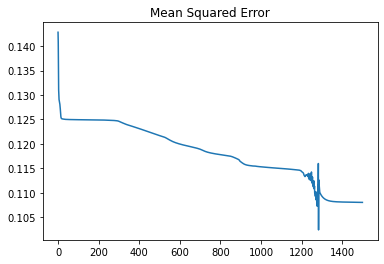

In [ ]:
results.mse.plot(title="Mean Squared Error")
# results.accuracy.plot(title="Accuracy")


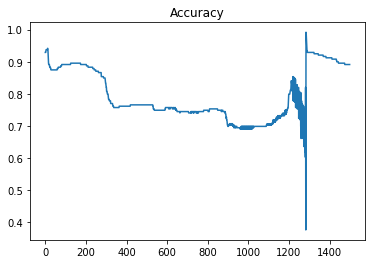

In [ ]:
results.accuracy.plot(title="Accuracy")

In [ ]:
# feedforward
Z1 = np.dot(X_test, W1)
A1 = sigmoid(Z1)

Z2 = np.dot(A1, W2)
A2 = sigmoid(Z2)

acc = accuracy(A2, y_test)
print("Accuracy: {}".format(acc))

Accuracy: 0.9


BPN FOR DATASET "BREAST CANCER"

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
from sklearn.preprocessing import LabelEncoder
Le = LabelEncoder()


In [ ]:
dataset_breastcancer = pd.read_csv('/content/data.csv')

In [ ]:
dataset_breastcancer.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [ ]:
dataset_breastcancer['fractal_dimension_worst'] = Le.fit_transform(dataset_breastcancer['fractal_dimension_worst'])

In [ ]:
features = dataset_breastcancer[['radius_mean','texture_mean','perimeter_mean','area_mean']]

# print(type(features))
# features_li = features.values.tolist()
# print(type(li))

label = dataset_breastcancer[['fractal_dimension_worst']]

# label_list = label.values.tolist()
# print(f"Features -> \n {features} \n and Label -> \n {label}")

In [ ]:
X = features
y = label
X = pd.get_dummies(X).values
y = pd.get_dummies(y).values

In [ ]:
X_train , X_test, y_train, y_test = train_test_split (X,y,test_size=0.2, random_state= 4)

In [ ]:
learning_rate = 0.25
iterations = 1500  #5000 can be changed
N = y_train.size

# number of input features
input_size = 4

# number of hidden layers neurons
hidden_size = 2

# number of neurons at the output layer
output_size = 3

results = pd.DataFrame(columns=["mse", "accuracy"])
print(results)

Empty DataFrame
Columns: [mse, accuracy]
Index: []


In [ ]:
# Initialize weights
np.random.seed(10)

# initializing weight for the hidden layer
W1 = np.random.normal(scale=0.5, size=(input_size, hidden_size))
print(W1)
# initializing weight for the output layer
W2 = np.random.normal(scale=0.5, size=(hidden_size , output_size))
print(W2)


[[ 0.66579325  0.35763949]
 [-0.77270015 -0.00419192]
 [ 0.31066799 -0.36004278]
 [ 0.13275579  0.05427426]]
[[ 0.00214572 -0.08730011  0.21651309]
 [ 0.60151869 -0.48253284  0.51413704]]


In [ ]:
def sigmoid(x):
  # binary_sig = ( 1 - np.exp(-x))/( 1 + np.exp(-x))
  # return binary_sig
  return 1 / (1 + np.exp(-x))


def mean_squared_error(y_pred, y_true):
    return ((y_pred - y_true)**2).sum() / (2*y_pred.size)

def accuracy(y_pred, y_true):
    acc = y_pred.argmax(axis=1) == y_true.argmax(axis=1)
    return acc.mean()

In [ ]:
for itr in range(iterations):

    # feedforward propagation
    # on hidden layer
    Z1 = np.dot(X_train, W1)
    A1 = sigmoid(Z1)

    # on output layer|
    Z2 = np.dot(A1, W2)
    A2 = sigmoid(Z2)


    # Calculating error

    mse = mean_squared_error(A2, y_train)
    acc = accuracy(A2, y_train)
    results=results.append({"mse":mse, "accuracy":acc},ignore_index=True )

    # backpropagation
    E1 = A2 - y_train
    dW1 = E1 * A2 * (1 - A2)

    E2 = np.dot(dW1, W2.T)
    dW2 = E2 * A1 * (1 - A1)


    # weight updates
    W2_update = np.dot(A1.T, dW1) / N
    W1_update = np.dot(X_train.T, dW2) / N

    W2 = W2 - learning_rate * W2_update
    W1 = W1 - learning_rate * W1_update

print(mse)
print(results)

46947.70769230841
               mse  accuracy
0     47067.948786       0.0
1     46947.707692       1.0
2     46947.707692       1.0
3     46947.707692       1.0
4     46947.707692       1.0
...            ...       ...
1495  46947.707692       1.0
1496  46947.707692       1.0
1497  46947.707692       1.0
1498  46947.707692       1.0
1499  46947.707692       1.0

[1500 rows x 2 columns]


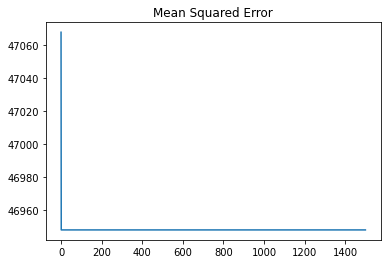

In [ ]:
results.mse.plot(title="Mean Squared Error")
# results.accuracy.plot(title="Accuracy")

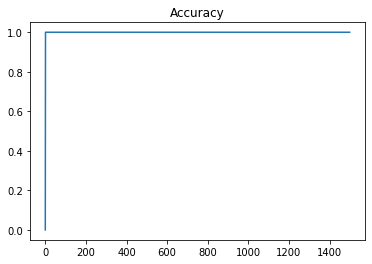

In [ ]:
results.accuracy.plot(title="Accuracy")

In [ ]:
# feedforward
Z1 = np.dot(X_test, W1)
A1 = sigmoid(Z1)

Z2 = np.dot(A1, W2)
A2 = sigmoid(Z2)

acc = accuracy(A2, y_test)
print("Accuracy: {}".format(acc))

Accuracy: 1.0
